In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [ ]:
# Only consider the top 20k words
max_features = 20000  

# Only consider the first 500 words of each movie review
maxlen = 500

# Embedding_dim
embedding_dim = 128

(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=max_features)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

17464789/17464789 [==============================] - 0s 0us/step
25000 Training sequences
25000 Validation sequences


In [ ]:
x_train.shape

(25000, 500)

In [ ]:
len(x_train[0])

500

# MLP

In [ ]:
mlp_model = keras.Sequential()

mlp_model.add(keras.Input(shape=(x_train.shape[1]), dtype=tf.int64, name='input_layer'))
mlp_model.add(keras.layers.Embedding(max_features, embedding_dim, name='embedding_layer'))
mlp_model.add(keras.layers.Flatten(name='flatten_layer'))
mlp_model.add(keras.layers.Dense(1024, activation='relu', name='dense_layer_1'))
mlp_model.add(keras.layers.Dense(128, activation='relu', name='dense_layer_2'))
mlp_model.add(keras.layers.Dense(1, activation='sigmoid', name='output_layer'))

mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 500, 128)         2560000   
                                                                 
 flatten_layer (Flatten)     (None, 64000)             0         
                                                                 
 dense_layer_1 (Dense)       (None, 1024)              65537024  
                                                                 
 dense_layer_2 (Dense)       (None, 128)               131200    
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 68,228,353
Trainable params: 68,228,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlp_model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history = mlp_model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
782/782 [==============================] - 20s 22ms/step - loss: 0.3863 - accuracy: 0.8140 - val_loss: 0.3077 - val_accuracy: 0.8671
Epoch 2/10
782/782 [==============================] - 16s 21ms/step - loss: 0.0572 - accuracy: 0.9810 - val_loss: 0.4372 - val_accuracy: 0.8516
Epoch 3/10
782/782 [==============================] - 17s 21ms/step - loss: 0.0097 - accuracy: 0.9967 - val_loss: 0.6392 - val_accuracy: 0.8496
Epoch 4/10
782/782 [==============================] - 16s 21ms/step - loss: 0.0147 - accuracy: 0.9953 - val_loss: 0.8453 - val_accuracy: 0.8384
Epoch 5/10
782/782 [==============================] - 16s 21ms/step - loss: 0.0144 - accuracy: 0.9952 - val_loss: 0.8645 - val_accuracy: 0.8320
Epoch 6/10
782/782 [==============================] - 16s 21ms/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.9643 - val_accuracy: 0.8405
Epoch 7/10
782/782 [==============================] - 16s 21ms/step - loss: 0.0066 - accuracy: 0.9977 - val_loss: 0.9808 - val_accuracy:

<Figure size 720x720 with 0 Axes>

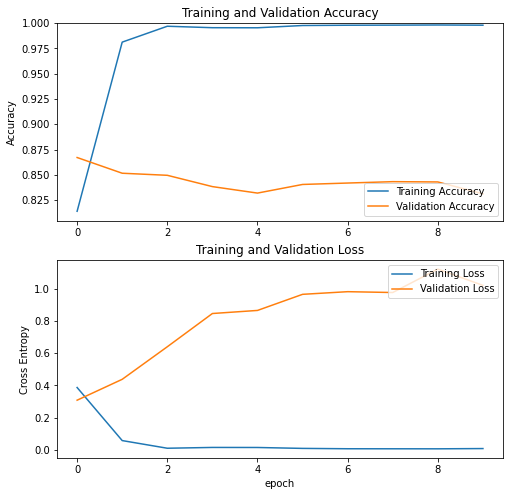

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Convolutional Neural Network

## 1.

In [ ]:
cnn_model=keras.Sequential()
cnn_model.add(keras.layers.Input(shape=(x_train.shape[1]), dtype=tf.int64, name='input_layer'))
cnn_model.add(keras.layers.Embedding(max_features, embedding_dim, name='embedding_layer'))
cnn_model.add(keras.layers.Conv1D(128, 7, padding='valid', activation='relu', strides=3, name='conv_layer_1'))
cnn_model.add(keras.layers.Conv1D(256, 7, padding='valid', activation='relu', strides=3, name='conv_layer_2'))
cnn_model.add(keras.layers.Flatten(name='flatten_layer'))
cnn_model.add(keras.layers.Dense(128, activation='relu', name='fc_layer'))
cnn_model.add(keras.layers.Dense(1, activation='relu', name='output_layer'))
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 500, 128)         2560000   
                                                                 
 conv_layer_1 (Conv1D)       (None, 165, 128)          114816    
                                                                 
 conv_layer_2 (Conv1D)       (None, 53, 256)           229632    
                                                                 
 flatten_layer (Flatten)     (None, 13568)             0         
                                                                 
 fc_layer (Dense)            (None, 128)               1736832   
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 4,641,409
Trainable params: 4,641,409
No

In [ ]:
cnn_model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history = cnn_model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
782/782 [==============================] - 15s 11ms/step - loss: 0.5537 - accuracy: 0.7964 - val_loss: 0.7698 - val_accuracy: 0.7944
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 0.4930 - accuracy: 0.8610 - val_loss: 0.5454 - val_accuracy: 0.8381
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 0.3478 - accuracy: 0.9350 - val_loss: 1.0183 - val_accuracy: 0.8398
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 0.2318 - accuracy: 0.9697 - val_loss: 1.3145 - val_accuracy: 0.8403
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.1833 - accuracy: 0.9825 - val_loss: 1.5446 - val_accuracy: 0.8376
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 0.2194 - accuracy: 0.9770 - val_loss: 1.6073 - val_accuracy: 0.7977
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 5.7980 - accuracy: 0.6141 - val_loss: 7.6246 - val_accuracy: 0.500

<Figure size 720x720 with 0 Axes>

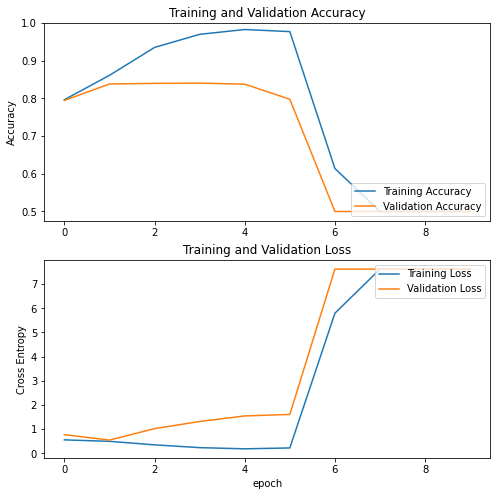

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## 2.

In [ ]:
cnn2_model=keras.Sequential()
cnn2_model.add(keras.layers.Input(shape=(x_train.shape[1]), dtype=tf.int64, name='input_layer'))
cnn2_model.add(keras.layers.Embedding(max_features, embedding_dim, name='embedding_layer'))
cnn2_model.add(keras.layers.Conv1D(128, 7, padding='valid', activation='relu', strides=3, name='conv_layer_1'))
cnn2_model.add(keras.layers.Conv1D(128, 7, padding='valid', activation='relu', strides=3, name='conv_layer_2'))
cnn2_model.add(keras.layers.GlobalMaxPooling1D(name='global_max_pooling_layer'))
cnn2_model.add(keras.layers.Dense(128, activation='relu', name='fc_layer'))
cnn2_model.add(keras.layers.Dense(1, activation='relu', name='output_layer'))
cnn2_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 500, 128)         2560000   
                                                                 
 conv_layer_1 (Conv1D)       (None, 165, 128)          114816    
                                                                 
 conv_layer_2 (Conv1D)       (None, 53, 128)           114816    
                                                                 
 global_max_pooling_layer (G  (None, 128)              0         
 lobalMaxPooling1D)                                              
                                                                 
 fc_layer (Dense)            (None, 128)               16512     
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                      

In [ ]:
cnn2_model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history = cnn2_model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
782/782 [==============================] - 9s 10ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Ep

<Figure size 720x720 with 0 Axes>

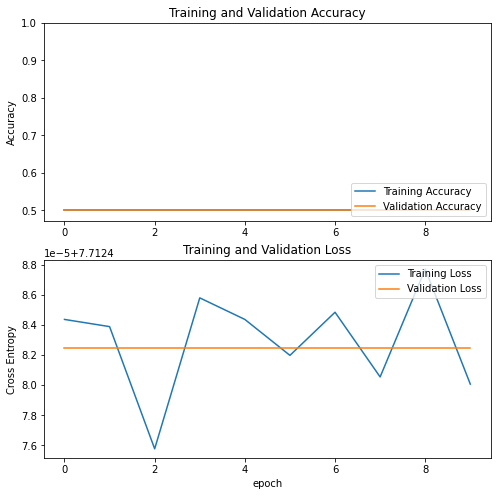

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Recurrent Neural Network

In [ ]:
rnn_model=keras.Sequential()
rnn_model.add(keras.layers.Input(shape=(x_train.shape[1], ), dtype=tf.int64, name='input_layer'))
rnn_model.add(keras.layers.Embedding(max_features, embedding_dim, name='embedding_layer'))
rnn_model.add(keras.layers.SimpleRNN(64, return_sequences=True, name='rnn_layer_1'))
rnn_model.add(keras.layers.SimpleRNN(64, name='rnn_layer_2'))
rnn_model.add(keras.layers.Dense(1, activation='sigmoid', name='output_layer'))
rnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 500, 128)         2560000   
                                                                 
 rnn_layer_1 (SimpleRNN)     (None, 500, 64)           12352     
                                                                 
 rnn_layer_2 (SimpleRNN)     (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 2,580,673
Trainable params: 2,580,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rnn_model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history = rnn_model.fit(x_train, y_train, batch_size=512, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
49/49 [==============================] - 58s 1s/step - loss: 0.6774 - accuracy: 0.5625 - val_loss: 0.5636 - val_accuracy: 0.7188
Epoch 2/10
49/49 [==============================] - 56s 1s/step - loss: 0.3573 - accuracy: 0.8476 - val_loss: 0.3943 - val_accuracy: 0.8342
Epoch 3/10
49/49 [==============================] - 57s 1s/step - loss: 0.0949 - accuracy: 0.9688 - val_loss: 0.5387 - val_accuracy: 0.7950
Epoch 4/10
49/49 [==============================] - 56s 1s/step - loss: 0.0148 - accuracy: 0.9969 - val_loss: 0.5660 - val_accuracy: 0.8328
Epoch 5/10
49/49 [==============================] - 55s 1s/step - loss: 0.0027 - accuracy: 0.9999 - val_loss: 0.6383 - val_accuracy: 0.8248
Epoch 6/10
49/49 [==============================] - 55s 1s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6417 - val_accuracy: 0.8396
Epoch 7/10
49/49 [==============================] - 55s 1s/step - loss: 6.6511e-04 - accuracy: 1.0000 - val_loss: 0.6631 - val_accuracy: 0.8401
Epoch 8/10
49/49

<Figure size 720x720 with 0 Axes>

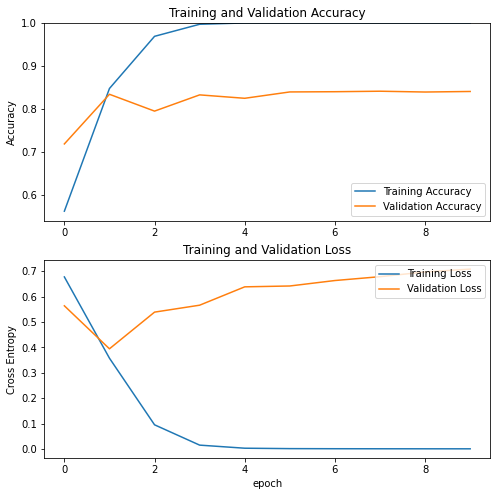

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Long-short term memory

In [ ]:
lstm_model=keras.Sequential()
lstm_model.add(keras.layers.Input(shape=(x_train.shape[1], ), dtype=tf.int64, name='input_layer'))
lstm_model.add(keras.layers.Embedding(max_features, embedding_dim, name='embedding_layer'))
lstm_model.add(keras.layers.LSTM(64, return_sequences=True, name='lstm_layer_1'))
lstm_model.add(keras.layers.LSTM(64, name='lstm_layer_2'))
lstm_model.add(keras.layers.Dense(1, activation='sigmoid', name='output_layer'))
lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 500, 128)         2560000   
                                                                 
 lstm_layer_1 (LSTM)         (None, 500, 64)           49408     
                                                                 
 lstm_layer_2 (LSTM)         (None, 64)                33024     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 2,642,497
Trainable params: 2,642,497
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history = lstm_model.fit(x_train, y_train, batch_size=512, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
49/49 [==============================] - 10s 123ms/step - loss: 0.5127 - accuracy: 0.7356 - val_loss: 0.3418 - val_accuracy: 0.8547
Epoch 2/10
49/49 [==============================] - 5s 108ms/step - loss: 0.2407 - accuracy: 0.9076 - val_loss: 0.3127 - val_accuracy: 0.8720
Epoch 3/10
49/49 [==============================] - 5s 109ms/step - loss: 0.1405 - accuracy: 0.9532 - val_loss: 0.3488 - val_accuracy: 0.8676
Epoch 4/10
49/49 [==============================] - 5s 109ms/step - loss: 0.0876 - accuracy: 0.9745 - val_loss: 0.4237 - val_accuracy: 0.8421
Epoch 5/10
49/49 [==============================] - 5s 109ms/step - loss: 0.0921 - accuracy: 0.9699 - val_loss: 0.4706 - val_accuracy: 0.8517
Epoch 6/10
49/49 [==============================] - 5s 110ms/step - loss: 0.0602 - accuracy: 0.9821 - val_loss: 0.4973 - val_accuracy: 0.8500
Epoch 7/10
49/49 [==============================] - 5s 109ms/step - loss: 0.0358 - accuracy: 0.9910 - val_loss: 0.6156 - val_accuracy: 0.8475
Epoch

<Figure size 720x720 with 0 Axes>

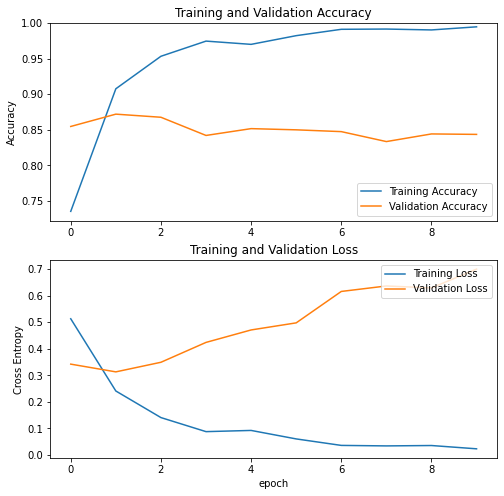

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Bidirectional LSTM

In [ ]:
bi_model=keras.Sequential()
bi_model.add(keras.Input(shape=(x_train.shape[1], ), name='input_layer'))
bi_model.add(keras.layers.Embedding(max_features, embedding_dim, name='embedding_layer'))
bi_model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True)))
bi_model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=False)))
bi_model.add(keras.layers.Dense(1, activation='sigmoid'))
bi_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 500, 128)         2560000   
                                                                 
 bidirectional (Bidirectiona  (None, 500, 128)         98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,757,761
Trainable params: 2,757,761
Non-trainable params: 0
_________________________________________________________________


In [ ]:
bi_model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history = bi_model.fit(x_train, y_train, batch_size=512, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
49/49 [==============================] - 18s 276ms/step - loss: 0.5377 - accuracy: 0.7114 - val_loss: 0.3918 - val_accuracy: 0.8316
Epoch 2/10
49/49 [==============================] - 14s 285ms/step - loss: 0.2538 - accuracy: 0.9019 - val_loss: 0.2925 - val_accuracy: 0.8786
Epoch 3/10
49/49 [==============================] - 12s 255ms/step - loss: 0.1412 - accuracy: 0.9511 - val_loss: 0.3413 - val_accuracy: 0.8652
Epoch 4/10
49/49 [==============================] - 12s 254ms/step - loss: 0.0806 - accuracy: 0.9764 - val_loss: 0.3854 - val_accuracy: 0.8704
Epoch 5/10
49/49 [==============================] - 12s 252ms/step - loss: 0.0531 - accuracy: 0.9857 - val_loss: 0.5135 - val_accuracy: 0.8566
Epoch 6/10
49/49 [==============================] - 12s 251ms/step - loss: 0.0354 - accuracy: 0.9913 - val_loss: 0.5445 - val_accuracy: 0.8608
Epoch 7/10
49/49 [==============================] - 12s 250ms/step - loss: 0.0296 - accuracy: 0.9927 - val_loss: 0.5946 - val_accuracy: 0.8607

<Figure size 720x720 with 0 Axes>

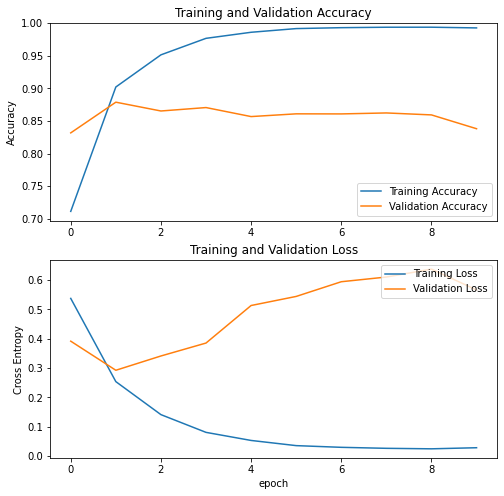

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()